# 360 Degree Customer View: The Foundation of Personalization on Brazilian E-Commerce Public Dataset by Olist
by Jessica Syafaq M

## Data Science Steps
   ### Business Understanding
        
    This is a Brazilian E-Commerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.
    
    This is real commercial data, it has been anonymized, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.
    
   ### Data Understanding

    Before I start making my hands dirty with the analysis, I should look into the data, examine it, find features types, find missing values, and do some cleaning.
    
   #### Reading Data
    The first step that I followed is to read all the .csv files as mentioned in the data overview part:

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import json
import seaborn as sns
import requests
import folium
import opendatasets as od
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import folium
from folium.plugins import FastMarkerCluster, HeatMap

#### Checking datasets info

In [2]:
#reading datas

import time
start = time.time()
data = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_customers_dataset.csv")
geo_data = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_geolocation_dataset.csv")
order_itemdata = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_order_items_dataset.csv")
pay_data = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_order_payments_dataset.csv")
rev_data = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_order_reviews_dataset.csv")
orders = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_orders_dataset.csv")
order_prddata = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_products_dataset.csv")
order_selldata = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/olist_sellers_dataset.csv")
order_prd_catdata = pd.read_csv("/Users/syafaqmuth/Desktop/Data Science/Startup Campus/Assignment #3/product_category_name_translation.csv")
end = time.time()
print("reading time: ",(end-start),"sec")

reading time:  2.7089507579803467 sec


In [3]:
#checking number of columns , column_names and no_of_rows

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]



info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Reds')

Observation(s):

* Dataset with maximum number of columns is products.
* Dataset with maximum number of rows is geolocations



In [4]:
#checking dtypes
datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Reds')

Observation(s):

* products dataset has maximum number of numerical features.
* orders dataset has maximum number of features of object dtype 
* We can also observe that all the timestamps are in object datatypes.So, we have to convert it into datetime type to do  analysis on these features.

In [5]:
datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset 
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset 
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values 
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values 
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Reds')

Observation(s):

* The maximum number of null-values are present in reviews dataset and the name of the columns with the null-values are review_comment_title and review_comment_message.
* products dataset contains least number of null- values but most of its columns has null-values.
* we have to deal with these null-values in future.

### Data Cleaning and Preparation

In [6]:
geo_data.replace(to_replace='são paulo',value='sao paulo',inplace=True)
geo_data.geolocation_city.value_counts()

sao paulo               160718
rio de janeiro           62151
belo horizonte           27805
curitiba                 16593
porto alegre             13521
                         ...  
baía formosa                 1
herval doeste                1
cachoeira dos índios         1
joca claudino                1
casserengue                  1
Name: geolocation_city, Length: 8010, dtype: int64

Firstly we will change wrong city name, we will be replacing são paulo with sao paulo as both define same city name. In the code beside we have looked at the value counts of cities resulting in changing the name and then giving us total values of cities in our data frame.

In [7]:
top_15 = geo_data[['geolocation_city','geolocation_lat','geolocation_lng']]
y= top_15['geolocation_city'].str.strip().value_counts().head(15)
#converting it in a list
list1=y.index.to_list()
list1

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'curitiba',
 'porto alegre',
 'salvador',
 'guarulhos',
 'brasilia',
 'sao bernardo do campo',
 'osasco',
 'santo andre',
 'niteroi',
 'recife',
 'goiania',
 'fortaleza']

Secondly we will remove the blank spaces from our geo_data using .strip() and then looking at top 15 number of cities having got most number of selling and buying zip codes in Brazil, for this we have again used value_counts() and finally we will convert that series data frame into to a list and saving in the variable list1 for future use.

In [8]:
#geo data of top 15 cities with there pin codes.
geo_data = geo_data[~geo_data['geolocation_city'].isin(list1)]
geo_data[:3]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
50999                         3203       -23.216648       -46.861371   
71908                         4004       -23.574798       -46.650106   
80754                         4132       -23.622721       -46.620360   

      geolocation_city geolocation_state  
50999          jundiaí                SP  
71908  taboão da serra                SP  
80754         sãopaulo                SP

Thirdly we will do some geographical changes in our geo_data, which will contain all the zip codes, latitude , longitude and city name of all the top 15 cities which we have saved above in list1. In geo_data data frame we will make some changes according to the latitude and longitude of Brazil, one can easily find the latitude and longitude of the desired city or country online. We did this data preparation for mapping the zip codes on folium map which will be used for geographical visualization.

In [9]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at']= pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']= pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

Fourthly we will change the data type of our data frame "orders", we will be changing it to date and time data type it will helps us to make the changes in our data frame.

In [10]:
# Getting values for purchase date, year and Month
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y,%m,%d'))

# Getting values for purchase day, day of the week and day_name
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Getting values for specific time of a day 
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)
orders[:5]

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_purchase_year  order_purchase_month  \
0                    2017-10-18                 2017                    10   
1                    2018-08-13                 2018                     7   
2                    2018-09-04                 2018                     8   
3                    2017-12-15                 2017                    11   
4                    2018-02-26                 2018                     2   

  order_purchase_month_name order_purchase_year_month order_purchase_date  \
0                       Oct                   2017.10          2017,10,02   
1                       Jul                   2018.07          2018,07,24   
2                       Aug                   2018.08          2018,08,08   
3                       Nov                   2017.11          2017,11,18   
4                       Feb                   2018.02          2018,02,13   

   order_purchase_day  order_purchase_dayofweek order_purchase_dayofweek_name  \
0                   2                         0                           Mon   
1                  24                         1                           Tue   
2                   8                         2                           Wed   
3                  18                         5                           Sat   
4                  13                         1                           Tue   

   order_purchase_hour order_purchase_time_day  
0                   10                 Morning  
1                   20                   Night  
2                    8                 Morning  
3                   19                   Night  
4                   21                   Night

As most of the values in this data frame is pointing to date and time it will be easy for visualizing. Left side code shows us how we getting values of each order id and putting its purcahse date, year month, day of the week, day name and then adding it according to time on a day, by labeling the time according to ['Early morning', 'Morning', 'Afternoon', 'Night'] which will be helpful to understand when the customer has received its order. At last we will use pd.cut() to separate the values according to hour bins and hour label, looking at the first 5 rows of our changed data frame. Now we have cleaned our data frames as we wished, lets move towards analysis and visualization

In [11]:
rev_new = rev_data.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)

In [12]:
df = pd.merge(orders,pay_data, on="order_id")
df = df.merge(data, on="customer_id")
df = df.merge(order_itemdata, on="order_id")
df = df.merge(order_prddata, on="product_id")
df = df.merge(order_prd_catdata, on="product_category_name")
df = df.merge(rev_new, on="order_id")
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_purchase_year  order_purchase_month  \
0                    2017-10-18                 2017                    10   
1                    2017-10-18                 2017                    10   
2                    2017-10-18                 2017                    10   
3                    2017-08-28                 2017                     8   
4                    2017-08-15                 2017                     8   

  order_purchase_month_name order_purchase_year_month order_purchase_date  \
0                       Oct                   2017.10          2017,10,02   
1                       Oct                   2017.10          2017,10,02   
2                       Oct                   2017.10          2017,10,02   
3                       Aug                   2017.08          2017,08,15   
4                       Aug                   2017.08          2017,08,02   

   order_purchase_day  order_purchase_dayofweek order_purchase_dayofweek_name  \
0                   2                         0                           Mon   
1                   2                         0                           Mon   
2                   2                         0                           Mon   
3                  15                         1                           Tue   
4                   2                         2                           Wed   

   order_purchase_hour order_purchase_time_day  payment_sequential  \
0                   10                 Morning                   1   
1                   10                 Morning                   3   
2                   10                 Morning                   2   
3                   18               Afternoon                   1   
4                   18               Afternoon                   1   

  payment_type  payment_installments  payment_value  \
0  credit_card                     1          18.12   
1      voucher                     1           2.00   
2      voucher                     1          18.59   
3  credit_card                     3          37.77   
4  credit_card                     1          37.77   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  3a51803cc0d012c3b5dc8b7528cb05f7                      3366     sao paulo   
4  ef0996a1a279c26e7ecbd737be23d235                      2290     sao paulo   

  customer_state  order_item_id                        product_id  \
0             SP              1  87285b34884572647811a353c7ac498a   
1             SP              1  87285b3

In [13]:
print("Number of rows after merging:",len(df))
print("Number of columns after merging:",len(df.columns))

Number of rows after merging: 115609
Number of columns after merging: 43


In [14]:
# all time stamps are in object dtype as observed above converting it into dataetime 
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',]]=df[['order_purchase_timestamp',
       'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   order_purchase_year            115609 non-null  int64         
 9   order_purchase_month           115609 non-null  int64         
 10  order_purchase_month_name      115609 non-null  object        
 11  

In [16]:
df.describe()

order_purchase_year  order_purchase_month  order_purchase_day  \
count        115609.000000         115609.000000       115609.000000   
mean           2017.539231              6.032022           15.558633   
std               0.505029              3.223457            8.663208   
min            2016.000000              1.000000            1.000000   
25%            2017.000000              3.000000            8.000000   
50%            2018.000000              6.000000           16.000000   
75%            2018.000000              8.000000           23.000000   
max            2018.000000             12.000000           31.000000   

       order_purchase_dayofweek  order_purchase_hour  payment_sequential  \
count             115609.000000        115609.000000       115609.000000   
mean                   2.747338            14.764430            1.093747   
std                    1.961085             5.321909            0.729849   
min                    0.000000             0.000000            1.000000   
25%                    1.000000            11.000000            1.000000   
50%                    3.000000            15.000000            1.000000   
75%                    4.000000            19.000000            1.000000   
max                    6.000000            23.000000           29.000000   

       payment_installments  payment_value  customer_zip_code_prefix  \
count         115609.000000  115609.000000             115609.000000   
mean               2.946233     172.387379              35061.537597   
std                2.781087     265.873969              29841.671732   
min                0.000000       0.000000               1003.000000   
25%                1.000000      60.870000              11310.000000   
50%                2.000000     108.050000              24241.000000   
75%                4.000000     189.480000              58745.000000   
max               24.000000   13664.080000              99980.000000   

       order_item_id          price  freight_value  product_name_lenght  \
count  115609.000000  115609.000000  115609.000000        115609.000000   
mean        1.194535     120.619850      20.056880            48.766541   
std         0.685926     182.653476      15.836184            10.034187   
min         1.000000       0.850000       0.000000             5.000000   
25%         1.000000      39.900000      13.080000            42.000000   
50%         1.000000      74.900000      16.320000            52.000000   
75%         1.000000     134.900000      21.210000            57.000000   
max        21.000000    6735.000000     409.680000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               115609.000000       115609.000000     115608.000000   
mean                   785.808198            2.205373       2113.907697   
std                    652.418619            1.717771       3781.754895   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    600.000000            1.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm   review_score  
count      115608.000000      115608.000000     115608.000000  115609.000000  
mean           30.307903          16.638477         23.113167       4.034409  
std            16.211108          13.473570         11.755083       1.385584  
min             7.000000           2.000000          6.000000       1.000000  
25%            18.000000           8.000000         15.000000       4.000000  
50%            25.000000          13.000000         20.000000       5.000000  
75%            38.000000          20.000000         30.000000       5.000000  
max           105.000000         105.000

### Exploratory Analysis and Visualization

#### Reviews

In [17]:
# checking the target variables i.e review score 
df.review_score.value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

In [18]:
def partition(x):
    if x < 3:
        return 0
    return 1
df['review_score']=df['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score now
df.review_score.value_counts()

1    97043
0    18566
Name: review_score, dtype: int64

Total Positive Reviews : 97043 , ( 83.94069665856463 %)
Total Negative Reviews : 18566 , ( 16.059303341435356 %)




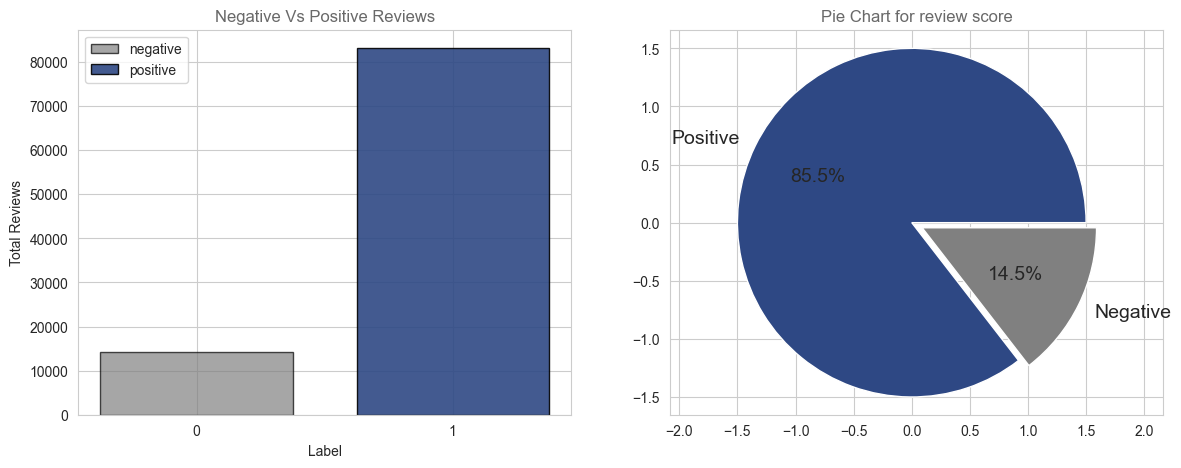

In [19]:
#counting the review score with 1 and 0
y_value_counts = df.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews',color='dimgrey')
plt.xticks([10,10.20],['0','1'])
#creating bar plots
plt.bar(10,14112, color = 'grey', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,83143,color = '#2e4884', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
labels = ['Positive','Negative']
sizes = [83143,14112]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
color={'#2e4884','grey'}
plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='dimgrey')
plt.show()

We can observe from the above plots 85.5% of the total reviews are positive i.e. 1 and only 14.5% reviews are negative i.e. which means that the given data set is imbalanced dataset.

In [20]:
#Correlation matrix 
corr_matrix = df.corr()

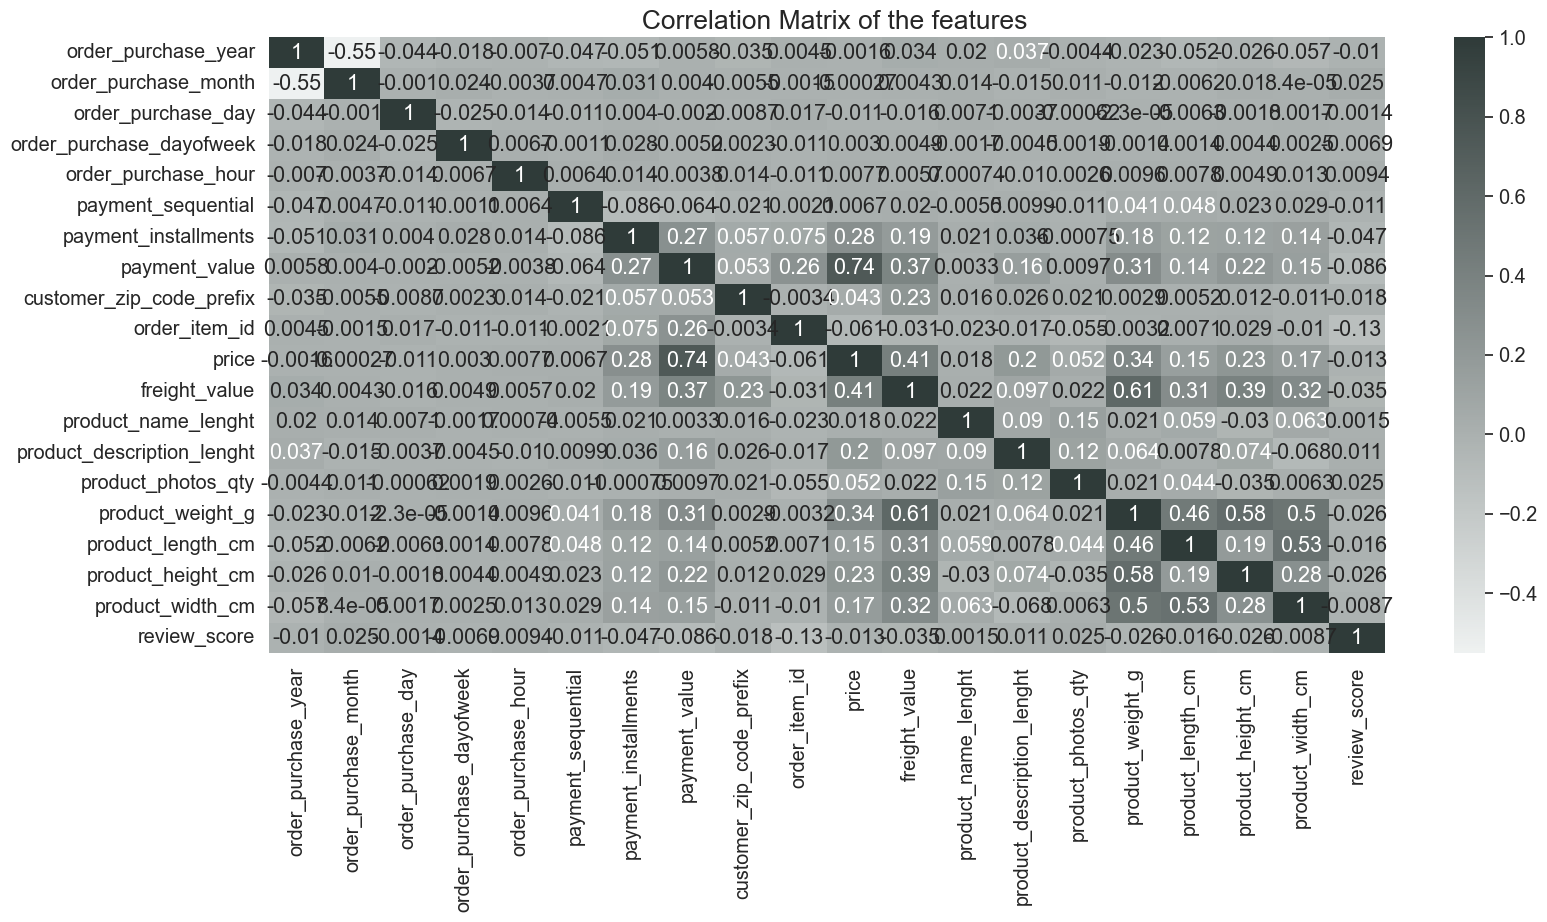

In [21]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("#2f3b39",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("  Correlation Matrix of the features",fontsize=19)
plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

There is a strong positive correlation between: (payment_value and price), (product_weight_g and freight_value also with product_width_cm), (product_length_cm and product_width_cm), (product_height_cm and product_weight_g).

#### Word Cloud

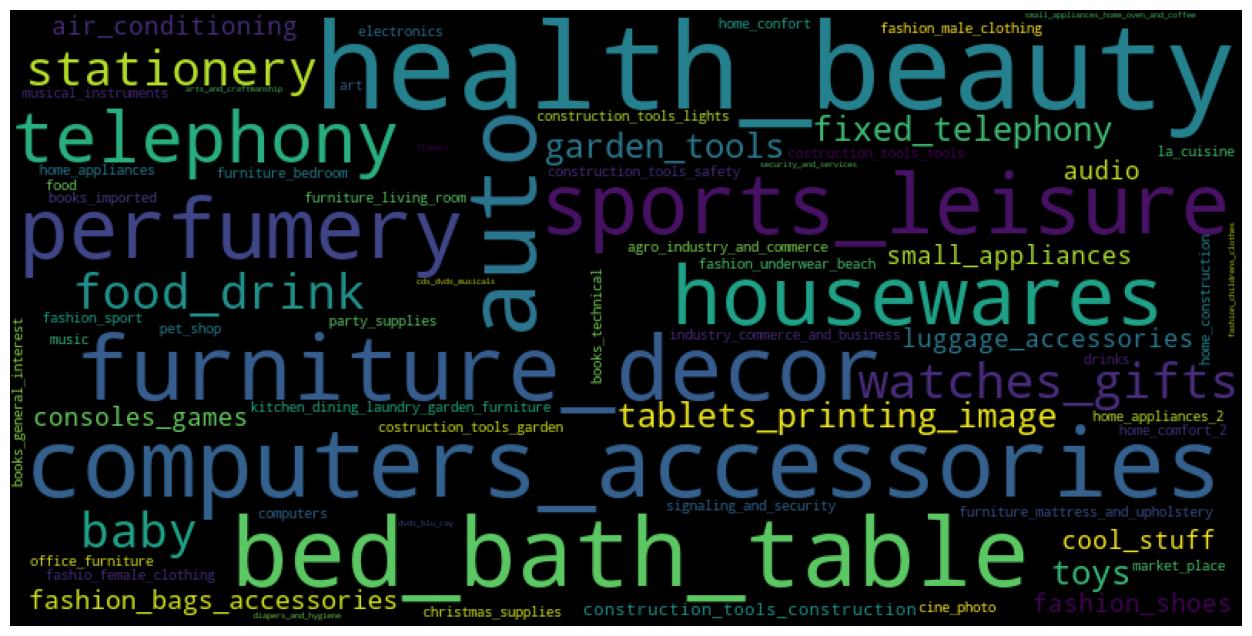

In [22]:
words = ' '.join((i for i in order_prd_catdata.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

Lets look at all the categories present in Olist in English language. Word Cloud has show us all `74` category names and highlighting health_beauty and computer_accessories means it has most number of products.

#### Plotting pin codes on map

In [23]:
#getting first 30000 zip codes
latitude = list(geo_data['geolocation_lat'])[:30000]
longitude = list(geo_data['geolocation_lng'])[:30000]
locations = list(zip(latitude, longitude))

In [24]:
m = folium.Map(location=[-23.54562128115268	, -46.63929204800168], zoom_start=11)
FastMarkerCluster(data=locations).add_to(m)
m

Lets see the selling and buying points of sao paulo according to zip codes. In the first block of code we will be making a list of first 3000 zip codes around Sao Paulo according to our geo location data frame, also we will be using zip function to get every values of Lat and Lng to be mapped. In second block of code we will using folium library to put on a blank map of brazil using location and then using FastMarkerCluster to add the geo points on map. If you visualize the map the number on points shows us the amount of zip codes present in that area and we can conclude from that it has that amount of selling and buying point in it.

## QnA about Data

### Q1
How many types of payment methods has been used for shopping and who got the highest percentage?

In [25]:
payment_types = pay_data.payment_type.value_counts().to_frame().reset_index()
payment_types['Percentage'] = round(payment_types.payment_type *100/payment_types.payment_type.sum(),2)
payment_types

index  payment_type  Percentage
0  credit_card         76795       73.92
1       boleto         19784       19.04
2      voucher          5775        5.56
3   debit_card          1529        1.47
4  not_defined             3        0.00

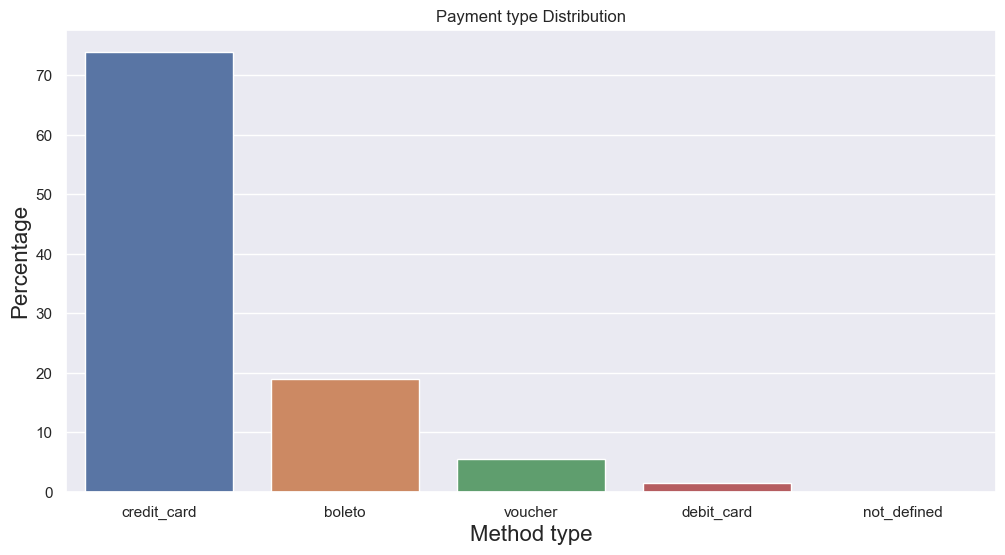

In [26]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=20)
sns.set_theme(style="darkgrid")
sns.barplot(x='index',y='Percentage',data=payment_types);

plt.title('Payment type Distribution');
plt.xlabel('Method type', fontsize=16);
plt.ylabel('Percentage', fontsize=16);

There are 5 types of method used for shopping and credit_card has been used 76795 times over the course of 2 years sharing **73.92%** among other types of payment.<br>
Boleto is bank wallet type of mode and we can say that **olist** provides better **voucher payments**  as it has got more amount of share than **debit card**

### Q2
Show the number of categories present in olist and how many items are present in that cateogry?

In [27]:
category_name = order_prddata.product_category_name.value_counts().to_frame()
category_name_df1 = category_name[:15]

In [28]:
fig = px.histogram(data_frame=category_name_df1,
           x='product_category_name',y= category_name_df1.index)

fig.update_layout(title="Top 15 types of category",
                    xaxis_title="Product count",
                    yaxis_title="Category Name",
                    plot_bgcolor='#000000',
    font=dict(
        family="Times New Roman",
        size=14,
        color="#8B0000"
    )
                 )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

We have made a data frame category name from our translation data frame which will contain product list , category name and translation of each category present in Olist. In above graph we can see top 15 category types and we can visualize from the graph cama_mesa_banho which means bed, table and bath has got the most amount of products touching around 3000 different types of products in it.

### Q3
Which category with the most number of order?

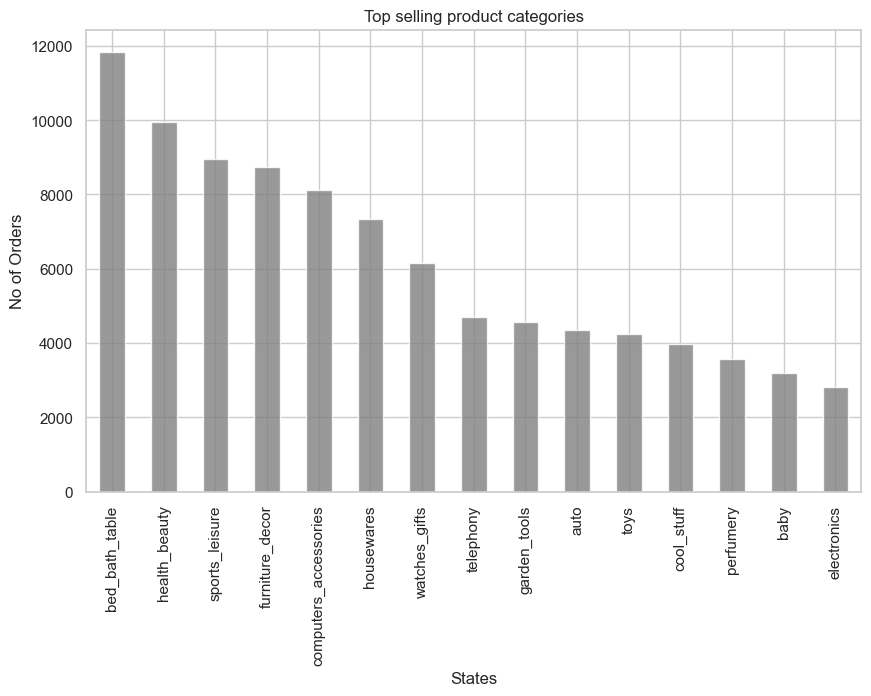

In [29]:
# State with the consumers count
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.product_category_name_english.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top selling product categories")
ax.set_xlabel("States")
plt.xticks(rotation=90)
ax.set_ylabel("No of Orders")
plt.show()

From the first plot titled Top selling product categories we can conclude that most ordered products is from bed_bath_table category ,health beauty and sports_leisure between 2016 and 2018.The least ordered products are from security_and_services.

### Q4
List top 15 cities having most selling points.

In [30]:
seller_city_data = order_selldata.seller_city.value_counts().head(15)
seller_city_df = seller_city_data.to_frame()

In [31]:
fig = px.bar(seller_city_df, 
             x="seller_city", 
             y=seller_city_df.index, 
             color="seller_city")
fig.update_layout(title="Top 15 cities having most selling points",
                xaxis_title="Number of orders",
                yaxis_title="City name",
                legend_title="length",
                plot_bgcolor='#000000',
    font=dict(
        family="Garamond",
        size=17,
        color="#8B0000"
    )
                 )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

Sao paulo has got most number of selling point which is around 700 which can be true as it is financial capital of Brazil and of Latin America as a whole.

### Q5 
 Whats is the status of orders around the course of 2 years?

In [32]:
orders[:3]

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_purchase_year  order_purchase_month  \
0                    2017-10-18                 2017                    10   
1                    2018-08-13                 2018                     7   
2                    2018-09-04                 2018                     8   

  order_purchase_month_name order_purchase_year_month order_purchase_date  \
0                       Oct                   2017.10          2017,10,02   
1                       Jul                   2018.07          2018,07,24   
2                       Aug                   2018.08          2018,08,08   

   order_purchase_day  order_purchase_dayofweek order_purchase_dayofweek_name  \
0                   2                         0                           Mon   
1                  24                         1                           Tue   
2                   8                         2                           Wed   

   order_purchase_hour order_purchase_time_day  
0                   10                 Morning  
1                   20                   Night  
2                    8                 Morning

In [33]:
all_count = orders.order_status.value_counts().sum()
status = orders.order_status.value_counts().to_frame()
status['Percentage'] = round((orders.order_status.value_counts() / all_count) *100,3)

In [34]:
fig = px.pie(status,
             values='Percentage',
             names=status.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Order status',
             hover_data=['order_status'])
fig.update_traces( textinfo='percent+label')
fig.update_layout(uniformtext_minsize=18)
fig.show()

Olist has successful delivery percentage around 97% which states that it has good delivery service which is crucial for any e-commerce brand.

## Conclusion


*   We have gone trough a extensive journey for understanding the data and plotting some useful charts to clarify the concepts and get insights from data.

*   Credict card is most used for payments in olist which is true because credit card company provides most amount of offers for there customers.

*   There are 74 different cateogry present in olist from where Brazilians can shop.


*  olist has nearly 97% successful delivery rate which shows there commitment towards the order and making this amount of successful deliveries will help them grow in near future.




## Future Work
- In near future we can look at all the reviews and comments and will try to analyze what people thinks about olist store.

- We can also use this dataset to map differently on graph as we have geo location of every pincode we can explore more into it.

- One more thing we can do is to list pricing of the products and tends to compare it with freight values which will be nect step to analyze transportation costs.

- Last but not the least we can try for a new olist dataset and comparing it will give us result whether its truly a geniune datset.

## References


- [Aakash N S. Analyzing Tabular Data with Pandas, 2021](https://jovian.ai/aakashns/python-pandas-data-analysis)

- [Aakash N S. Data Visualization using Python Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization) 

- [Aakash N S. Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)

- [Aakash N S. Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)

- [Plotly Documentation](https://plotly.com/python/)

- [Aakash N S. Plotly-line-chart](https://jovian.ai/aakashns/plotly-line-chart)

- [Jovian EDA from strach](https://youtu.be/kLDTbavcmd0)